 WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of CitiesWeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by Using the citipy 
Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [3]:
# query URL
#url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[7]}&appid={weather_api_key}"
#requests.get(url).json()

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
   

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather["dt"]

        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except Exception as e :
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | morris
Processing Record 2 of Set 1 | oyama
Processing Record 3 of Set 1 | soio
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | lethem
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | nikol'sk
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | cole harbour
Processing Record 16 of Set 1 | kailua-kona
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | pimentel
Processing Record 19 of Set 1 | ujae
Processing Record 20 of Set 1 | diebougou
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | port-aux-

In [5]:
# Convert the cities weather data into a Pandas DataFrame;
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,morris,40.8334,-74.5329,286.66,69,75,2.57,US,1682614719
1,oyama,36.3000,139.8000,289.32,66,63,3.42,JP,1682614719
2,soio,-6.1349,12.3689,300.25,84,99,4.00,AO,1682614721
3,bredasdorp,-34.5322,20.0403,289.48,70,92,4.11,ZA,1682614637
4,grytviken,-54.2811,-36.5092,276.37,90,48,4.00,GS,1682614610


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,morris,40.8334,-74.5329,286.66,69,75,2.57,US,1682614719
1,oyama,36.3000,139.8000,289.32,66,63,3.42,JP,1682614719
2,soio,-6.1349,12.3689,300.25,84,99,4.00,AO,1682614721
3,bredasdorp,-34.5322,20.0403,289.48,70,92,4.11,ZA,1682614637
4,grytviken,-54.2811,-36.5092,276.37,90,48,4.00,GS,1682614610


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

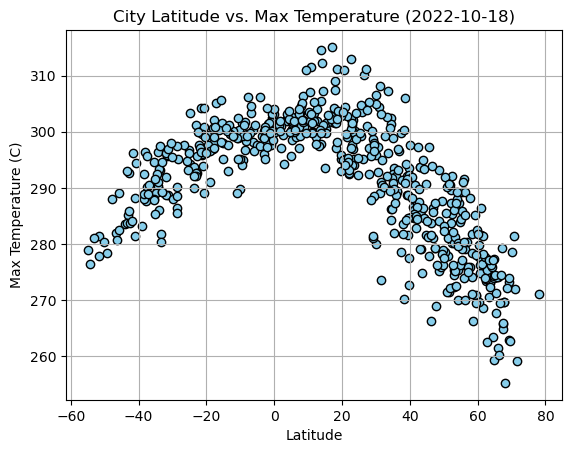

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (True)
# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

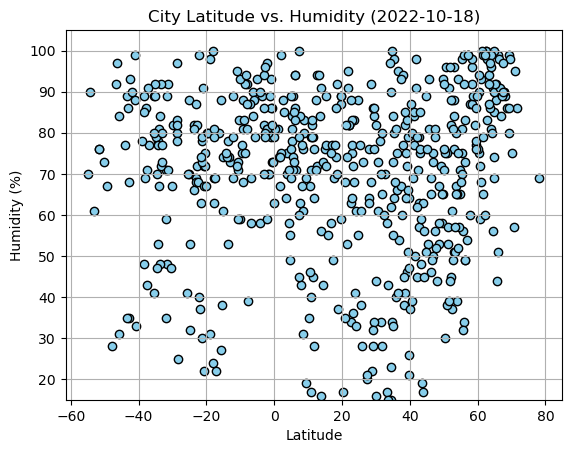

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (True)
# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

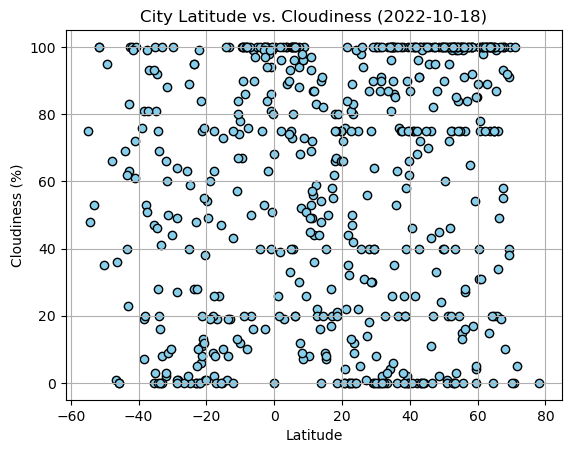

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

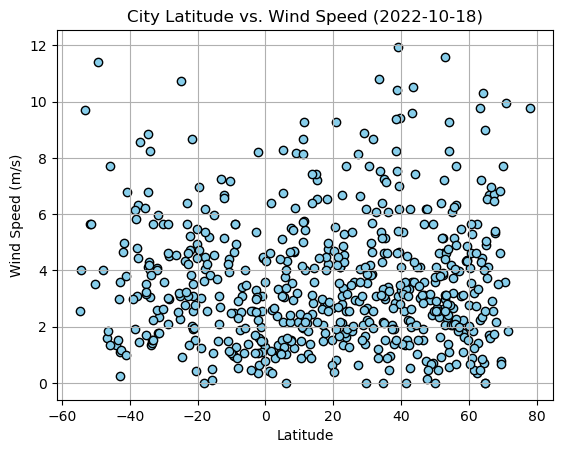

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid (True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # linear equation
    (slope, intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
    regress_values = x_values* slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show
    print(f"The r-value is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,morris,40.8334,-74.5329,286.66,69,75,2.57,US,1682614719
1,oyama,36.3000,139.8000,289.32,66,63,3.42,JP,1682614719
5,bethel,41.3712,-73.4140,284.69,84,100,0.00,US,1682614449
7,lethem,3.3803,-59.7968,302.04,64,100,2.37,GY,1682614723
9,nikol'sk,53.7189,46.0712,287.25,67,99,2.30,RU,1682614723


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,soio,-6.1349,12.3689,300.25,84,99,4.00,AO,1682614721
3,bredasdorp,-34.5322,20.0403,289.48,70,92,4.11,ZA,1682614637
4,grytviken,-54.2811,-36.5092,276.37,90,48,4.00,GS,1682614610
6,mount gambier,-37.8333,140.7667,287.60,86,53,4.78,AU,1682614722
8,waitangi,-43.9535,-176.5597,283.61,77,69,1.34,NZ,1682614723


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7198528209109889


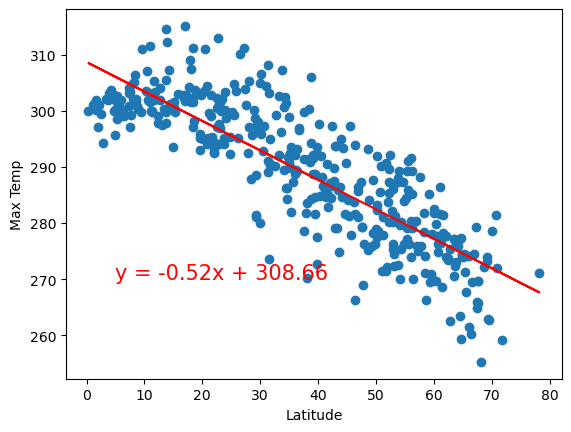

In [16]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (5,270))


The r-value is: 0.6248294862661101


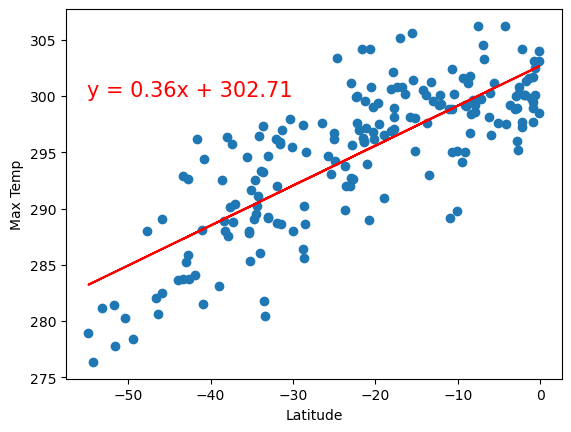

In [17]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]


x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 300))


#**Discussion about the linear relationship:**Temp vs Latitude

In northern hemisphere, as latitude increases we move further away from the equator, where as in southern hemisphere its the other way, as the latitude decreases we move further away from the equator.

Looks like for northern hemisphere their is a significant negative correlation between Max Temperature while in the southern hemisphere there is a positive correlation between latitude and Max Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05218054484700214


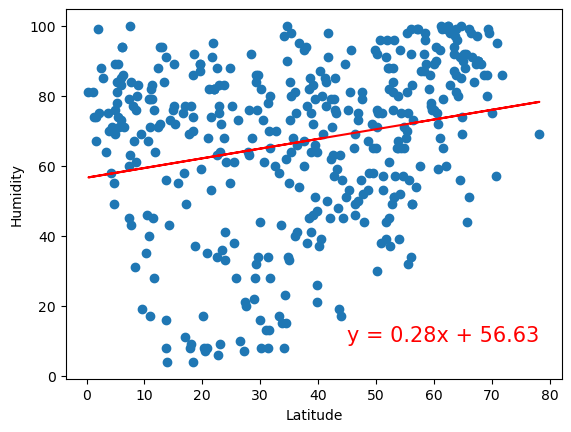

In [18]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45,10))




The r-value is: 0.02801150127430246


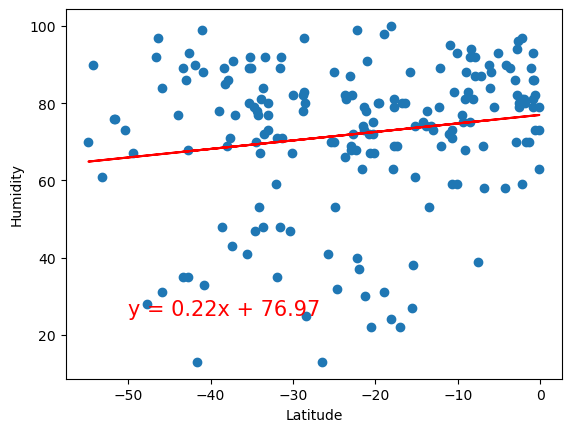

In [19]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]


x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50,25))


Discussion about the linear relationship:Humidity vs Latitude

As latitude increases in the northern hemisphere the humidity also increases, which means their is a positive correlation between humidity and latitude.

As for southern hemisphere their is no significant corelation between humidity and latitude.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011705013943576347


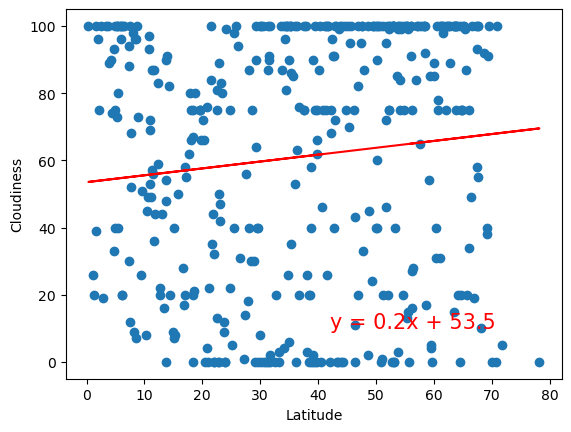

In [20]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (42,10))



The r-value is: 0.03413820727683711


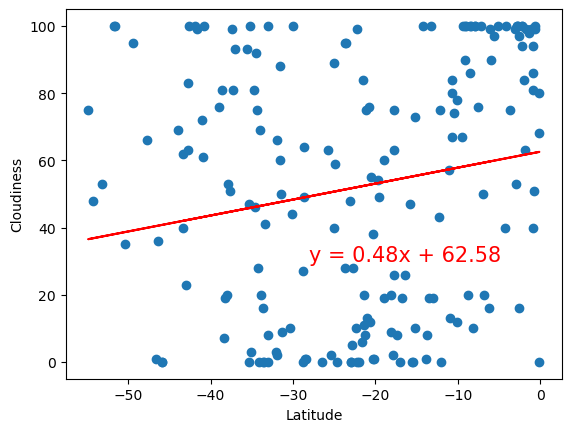

In [21]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]


x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-28,30))



*Discussion about the linear relationship:**Cloudiness vs Lat

As for northern hemisphere, increase in latitude does not have much impact to increase in the clodiness but their is positive correlation between cloudiness and latitude 

As for southern hemisphere their is no correlation between decrease in latitude or cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003793326447772069


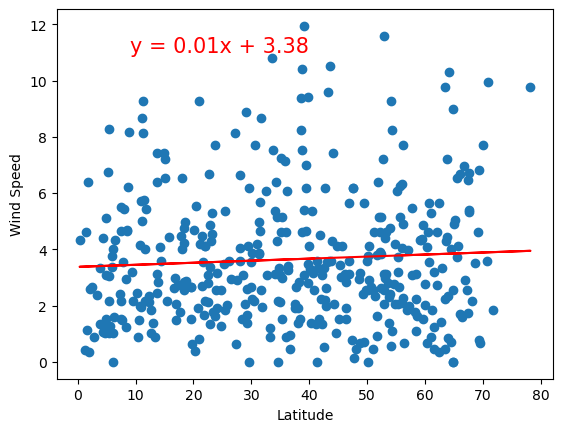

In [24]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (9,11))



The r-value is: 0.06240175683366022


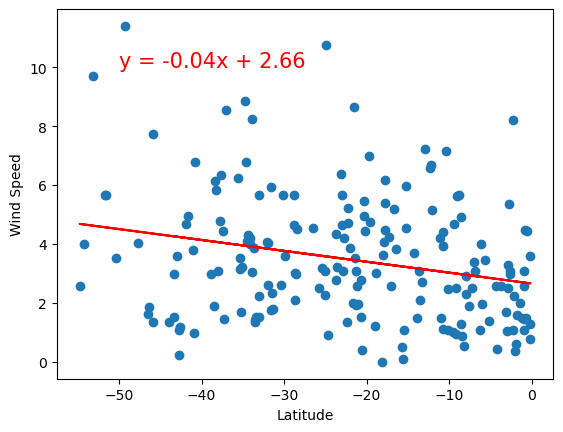

In [23]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]


x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,10))



*Discussion about the linear relationship: Wind Speed vs Lat

For the northern hemisphere as the latitude increases we move further away from the equator and the wind speed is significant, does look like having positive correlation but looking at pvalue, it seems their is a weak realation between latitude and wind speed. 

For southern hemisphere as the latitude increases , we move closer to equator and seems to have no corealtion between latitude and wind speed.
